# Cargamos Datos

In [10]:
import fastai
import torch
from fastai.vision import *
from shutil import copyfile
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import os
!easy_install pip

Searching for pip
Best match: pip 18.1
Adding pip 18.1 to easy-install.pth file
Installing pip script to /opt/conda/envs/fastai/bin
Installing pip3 script to /opt/conda/envs/fastai/bin
Installing pip3.6 script to /opt/conda/envs/fastai/bin

Using /opt/conda/envs/fastai/lib/python3.6/site-packages
Processing dependencies for pip
Finished processing dependencies for pip


In [2]:
path = '/shared/pytorch-CycleGAN-and-pix2pix/results_TFG/Colorization_Clinic_CanRuti/test_latest/images'

In [3]:
variant = os.listdir('/shared/Datasets_Classification/Classification_CanRuti/VARIANT_LYMPHOCYTE')
atypical = os.listdir('/shared/Datasets_Classification/Classification_CanRuti/ATYPICAL_LYMPHOCYTE')
blast = os.listdir('/shared/Datasets_Classification/Classification_CanRuti/BLAST')

In [4]:
def catcher(x): return re.findall('([a-zA-Z]+_+[\d]+)', x)[0]


In [5]:
variant_png = [catcher(i)+'_fake_B_rgb.png' for i in variant]
atypical_png = [catcher(i)+'_fake_B_rgb.png' for i in atypical]
blast_png = [catcher(i)+'_fake_B_rgb.png' for i in blast]

In [6]:
#for i in variant_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/VARIANT_LYMPHOCYTE", i))
#    
#for i in blast_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/BLAST", i))
#    
#for i in atypical_png:
#    copyfile(os.path.join(path,i), os.path.join("/shared/CanRuti_Fake/ATYPICAL_LYMPHOCYTE", i))
#    

In [7]:
folder_1 = os.listdir("/shared/Datasets_Classification/CanRuti_Fake_Colorization/ATYPICAL_LYMPHOCYTE")
folder_2 = os.listdir("/shared/Datasets_Classification/CanRuti_Fake_Colorization/VARIANT_LYMPHOCYTE")
folder_3 = os.listdir("/shared/Datasets_Classification/CanRuti_Fake_Colorization/BLAST")
dic_Classif = {
      'ATYPICAL_LYMPHOCYTE':len(folder_1),
      'VARIANT_LYMPHOCYTE':len(folder_2),
      'BLAST':len(folder_3)
     }

pd.DataFrame(dic_Classif, index=['N'])

ATYPICAL_LYMPHOCYTE  VARIANT_LYMPHOCYTE  BLAST
N                   47                  57     80

In [8]:
folder_classes = "/shared/Datasets_Classification/CanRuti_Fake_Colorization"
tfms = get_transforms(flip_vert=True, max_warp=None, max_zoom=1.01, max_rotate=120, max_lighting=0.1)


#### Creación del DataBunch de las imágenes de Can Ruti Fake

Aunque haya una separación del 50 por ciento en cada set, solo se utilizará un conjunto de validación para el test, el de training se ignorará

In [9]:
df_train = pd.read_csv('/shared/can_ruti/train.csv')
df_train['x'] = df_train['x'].apply(lambda x: x.replace('.jpg', '_fake_B_rgb.png'))
df_train['z'] = False
df_train.head()

x      y      z
0  BLAST/BL_10600573_fake_B_rgb.png  BLAST  False
1  BLAST/BL_13076127_fake_B_rgb.png  BLAST  False
2  BLAST/BL_12630836_fake_B_rgb.png  BLAST  False
3  BLAST/BL_10600634_fake_B_rgb.png  BLAST  False
4  BLAST/BL_12630955_fake_B_rgb.png  BLAST  False

In [10]:
df_valid = pd.read_csv('/shared/can_ruti/validation.csv')
df_valid['x'] = df_valid['x'].apply(lambda x: x.replace('.jpg', '_fake_B_rgb.png'))
df_valid['z'] = True
df_valid.head()

x                    y     z
0  ATYPICAL_LYMPHOCYTE/LY_13166703_fake_B_rgb.png  ATYPICAL_LYMPHOCYTE  True
1  ATYPICAL_LYMPHOCYTE/LY_13103960_fake_B_rgb.png  ATYPICAL_LYMPHOCYTE  True
2                BLAST/BL_10600656_fake_B_rgb.png                BLAST  True
3   VARIANT_LYMPHOCYTE/LY_13130834_fake_B_rgb.png   VARIANT_LYMPHOCYTE  True
4                BLAST/BL_10600719_fake_B_rgb.png                BLAST  True

In [11]:
df_split = pd.concat([df_train, df_valid])
df_split = df_split.rename(columns={'x': 'name','y': 'label','z':'is_valid'})
df_split.head()

name  label  is_valid
0  BLAST/BL_10600573_fake_B_rgb.png  BLAST     False
1  BLAST/BL_13076127_fake_B_rgb.png  BLAST     False
2  BLAST/BL_12630836_fake_B_rgb.png  BLAST     False
3  BLAST/BL_10600634_fake_B_rgb.png  BLAST     False
4  BLAST/BL_12630955_fake_B_rgb.png  BLAST     False

In [12]:
folder_classes

'/shared/Datasets_Classification/CanRuti_Fake_Colorization'

In [13]:
data = (ImageList.from_df(df_split, folder_classes) #Where to find the data? -> in path and its subfolders
        .split_from_df()         #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .transform(tfms, size=224)       #Data augmentation? -> use tfms with a size of 64
        .databunch()
        .normalize(imagenet_stats))   

In [14]:
data.batch_size = 20

#### Descripción del Conjunto de datos Can Ruti Fake

In [15]:
pd.DataFrame.from_dict({'Number of classes':[data.c],
'train_size':[len(data.train_ds)],
'valid_size':[len(data.valid_ds)]},
orient = 'index', columns=['N'])

N
Number of classes   3
train_size         92
valid_size         92

#### Conteo de clases del conjunto de training de datos Can Ruti Fake

train_ds = data.train_ds.to_df()
pd.DataFrame(train_ds['y'].value_counts()).rename(columns={'y':'N'})

#### Conteo de clases del conjunto de validación de datos Can Ruti Fake

valid_ds = data.valid_ds.to_df()
pd.DataFrame(valid_ds['y'].value_counts()).rename(columns={'y':'N'})

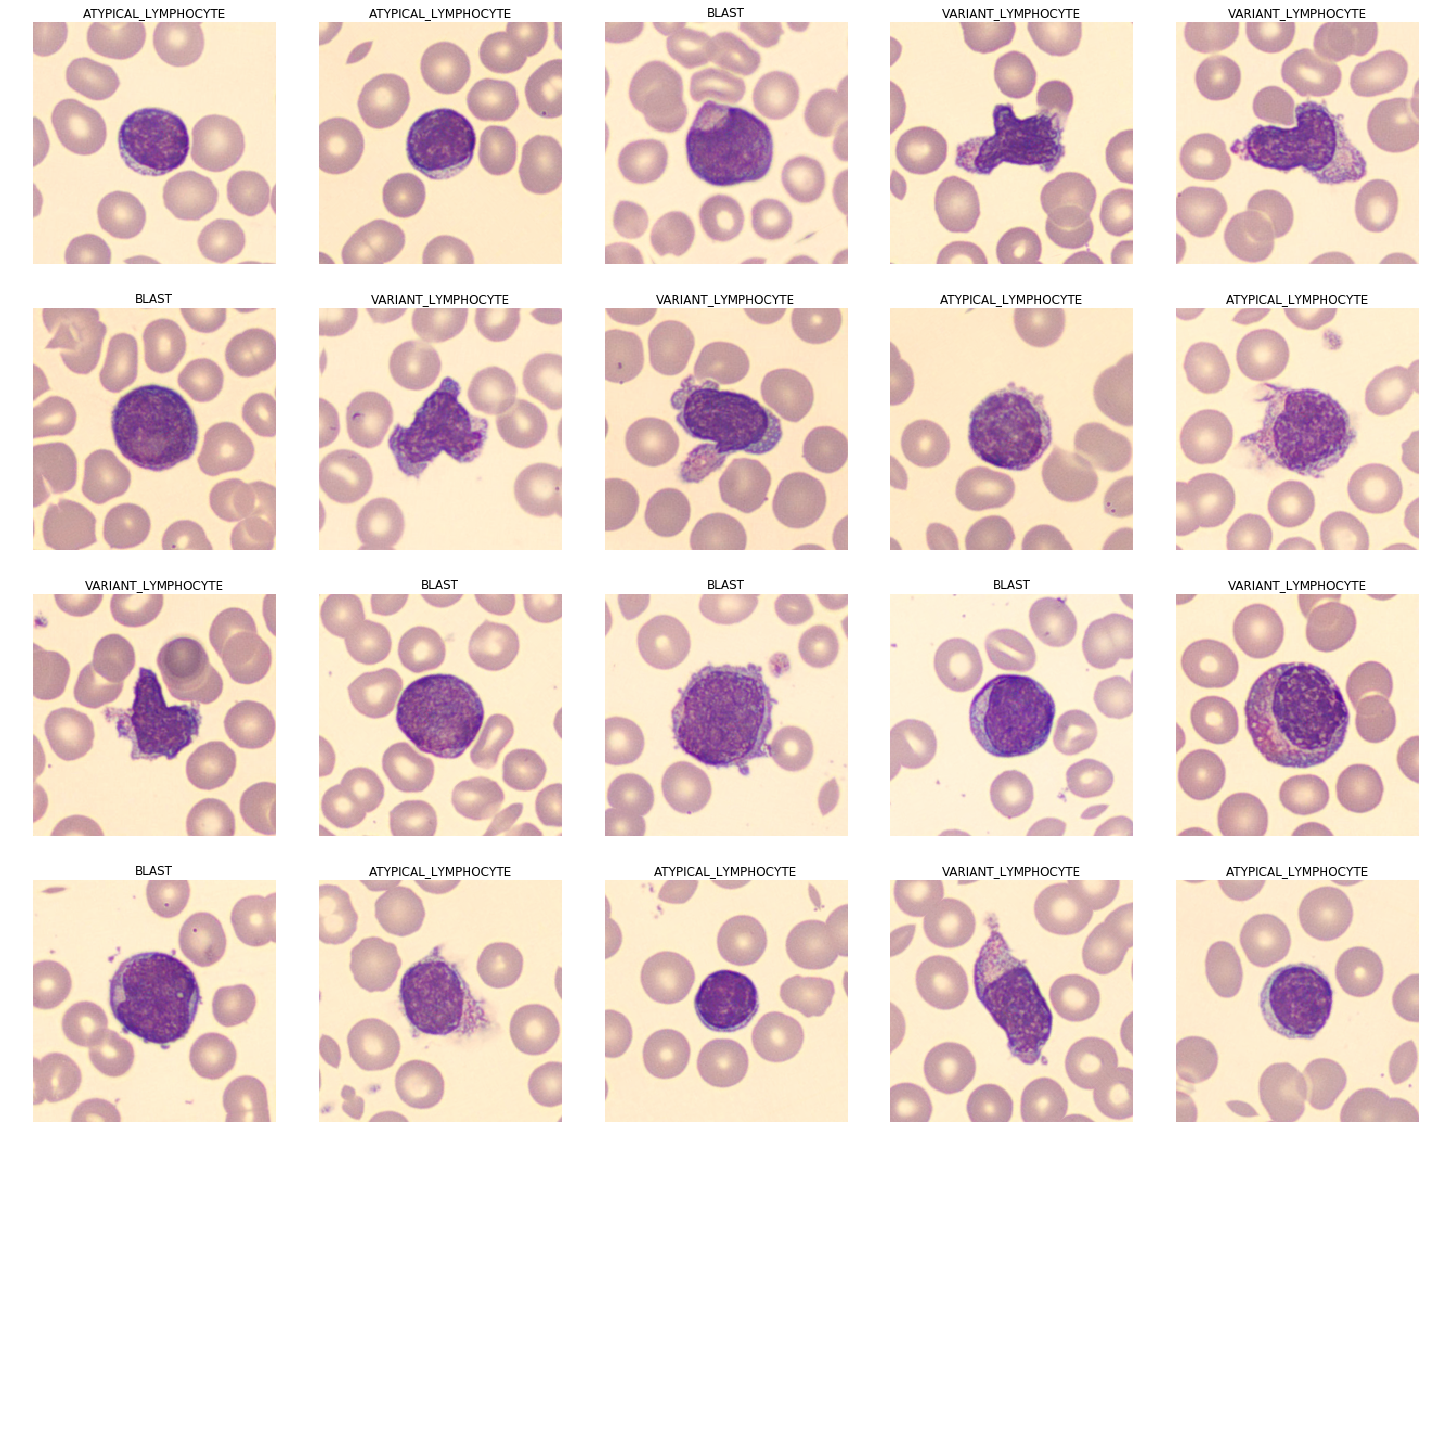

In [16]:
data.show_batch()


# Test Canruti Resnet 18 Fake Preentrenada en Clinic

Se crea un learner con datos auxilares del clinic pero se sustituye con el Databunch de CanRuti anterior para validar en CanRuti. Nótese que se incorporan los pesos del clínic con el método `.load()`

In [17]:
folder_models = "/shared/Datasets_Classification/Classification_Clinic_Balanced"
learn = None
learn = load_learner(folder_models, 'export_stage-2-18-Clinic_Balanced_3_Classes')
learn.data = data


Estadísticas de la validación den CanRuti

In [18]:
results = learn.validate()
plt.rcParams.update({'font.size': 18})
valid_CanRuti = dict(zip(['valid_loss', 'error_rate', 'accuracy'],
                         [results[0], results[1].item(),results[2].item()]))

pd.DataFrame(valid_CanRuti, index = ['metrics'])

valid_loss  error_rate  accuracy
metrics    3.345736    0.684783  0.315217

In [19]:
plt.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import precision_score, recall_score

def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

val_preds,val_targets = learn.get_preds() 

y_test = pd.Series(np.array(val_preds.max(1)[1])).map(dict(zip([0,1,2],learn.data.classes)))
y_true = pd.Series(np.array(val_targets)).map(dict(zip([0,1,2],learn.data.classes)))


precision = precision_score(y_test, y_true, average='micro')
recall = recall_score(y_test, y_true, average='micro')

pd.DataFrame({#'multiclass_roc_auc_score': multiclass_roc_auc_score(y_test, y_true),
             'precision':precision,
             'recall':recall,
             }, index = ['metrics'])

precision    recall
metrics   0.315217  0.315217

`Matriz de confusión` de la validación en Can Ruti

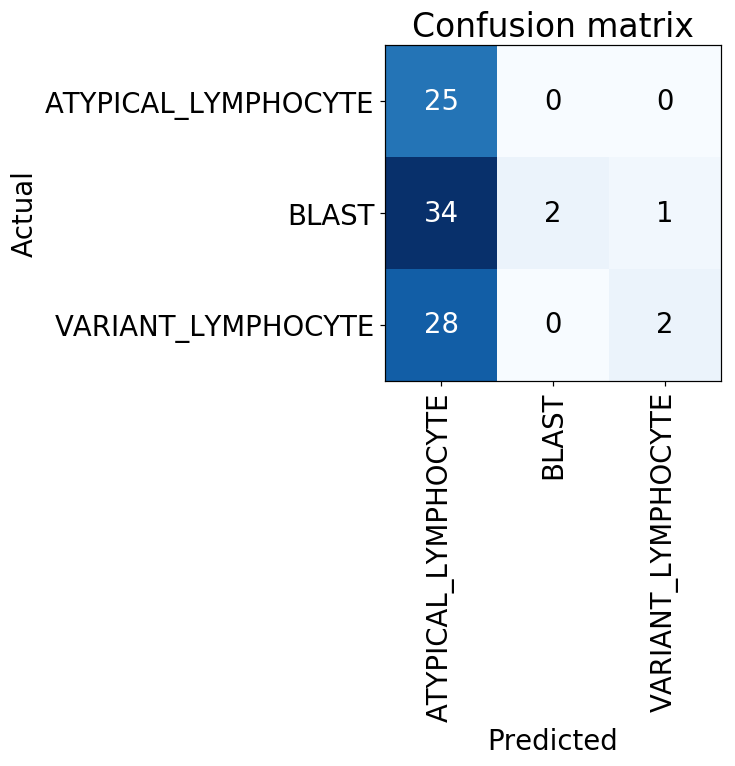

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7,7), dpi=110)




`Matriz de confusión normalizada` de la validación en Can Ruti

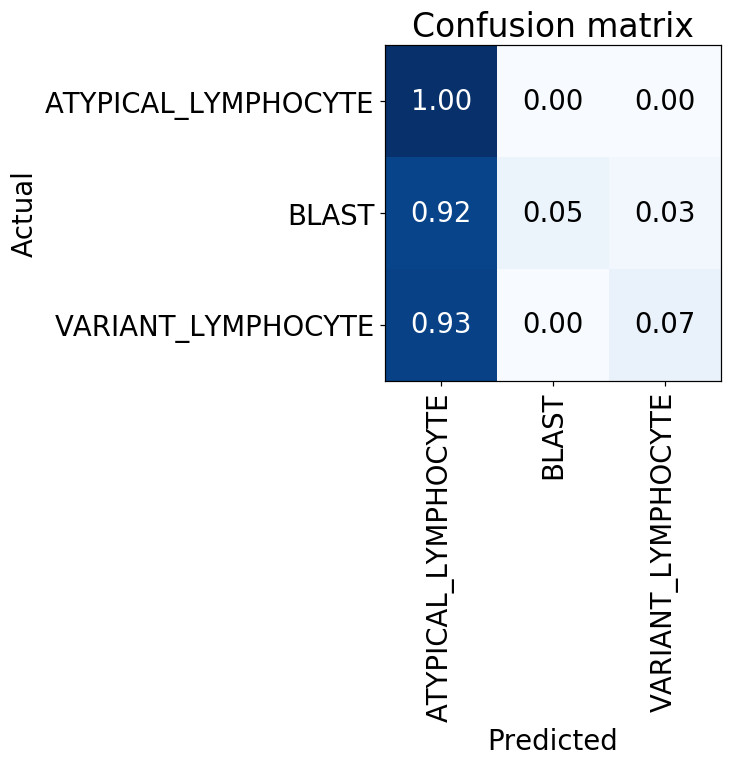

In [40]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110, normalize=True)

In [41]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

#### Fine Tuning en el conjunto de CanRuti

In [19]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=(3e-4))

In [20]:
learn.fit_one_cycle(4, max_lr=(3e-4))

In [21]:
learn.fit_one_cycle(2, max_lr=(3e-4))

In [22]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [23]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))

In [25]:
learn.fit_one_cycle(2, max_lr=slice(3e-4))


In [26]:
plt.rcParams.update({'font.size': 18})
val_preds,val_targets = learn.get_preds() 
y_test = pd.Series(np.array(val_preds.max(1)[1])).map(dict(zip([0,1,2],learn.data.classes)))
y_true = pd.Series(np.array(val_targets)).map(dict(zip([0,1,2],learn.data.classes)))
pd.DataFrame({'multiclass_roc_auc_score': multiclass_roc_auc_score(y_test, y_true)}, index = ['metrics'])

multiclass_roc_auc_score
metrics                  0.967391

In [27]:
interp = ClassificationInterpretation.from_learner(learn)

interp.most_confused(min_val=2)

[('BLAST', 'ATYPICAL_LYMPHOCYTE', 2)]

`Matriz de confusión` tras el fine tuning en Can Ruti

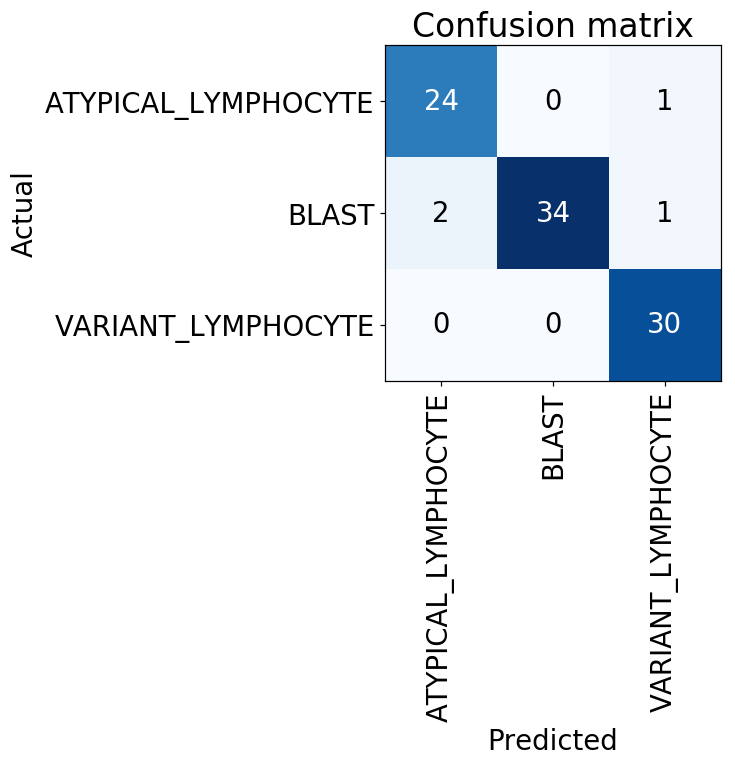

In [28]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110)

`Matriz de confusión Normalizada` tras el fine tuning en Can Ruti

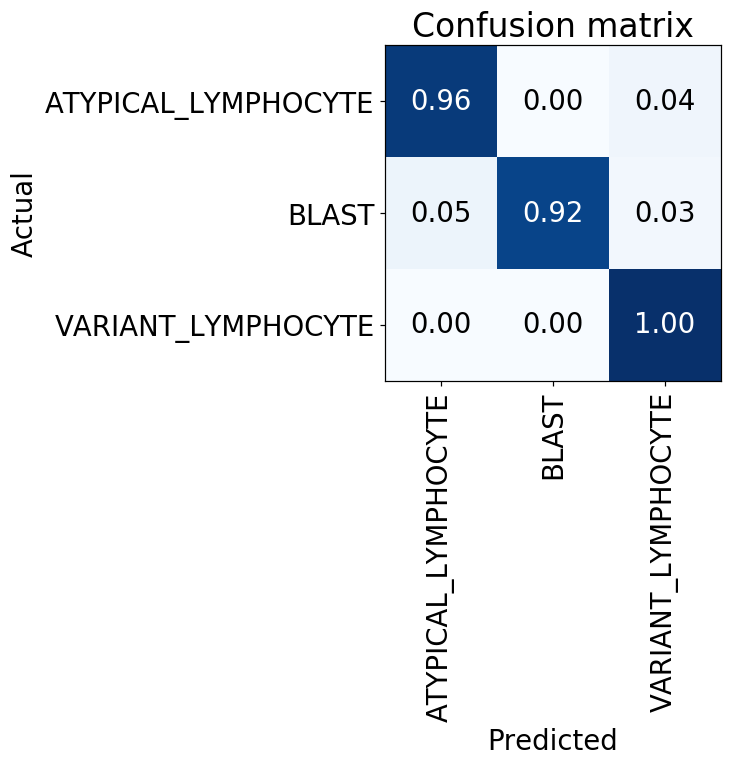

In [29]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=110, normalize=True)

In [30]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

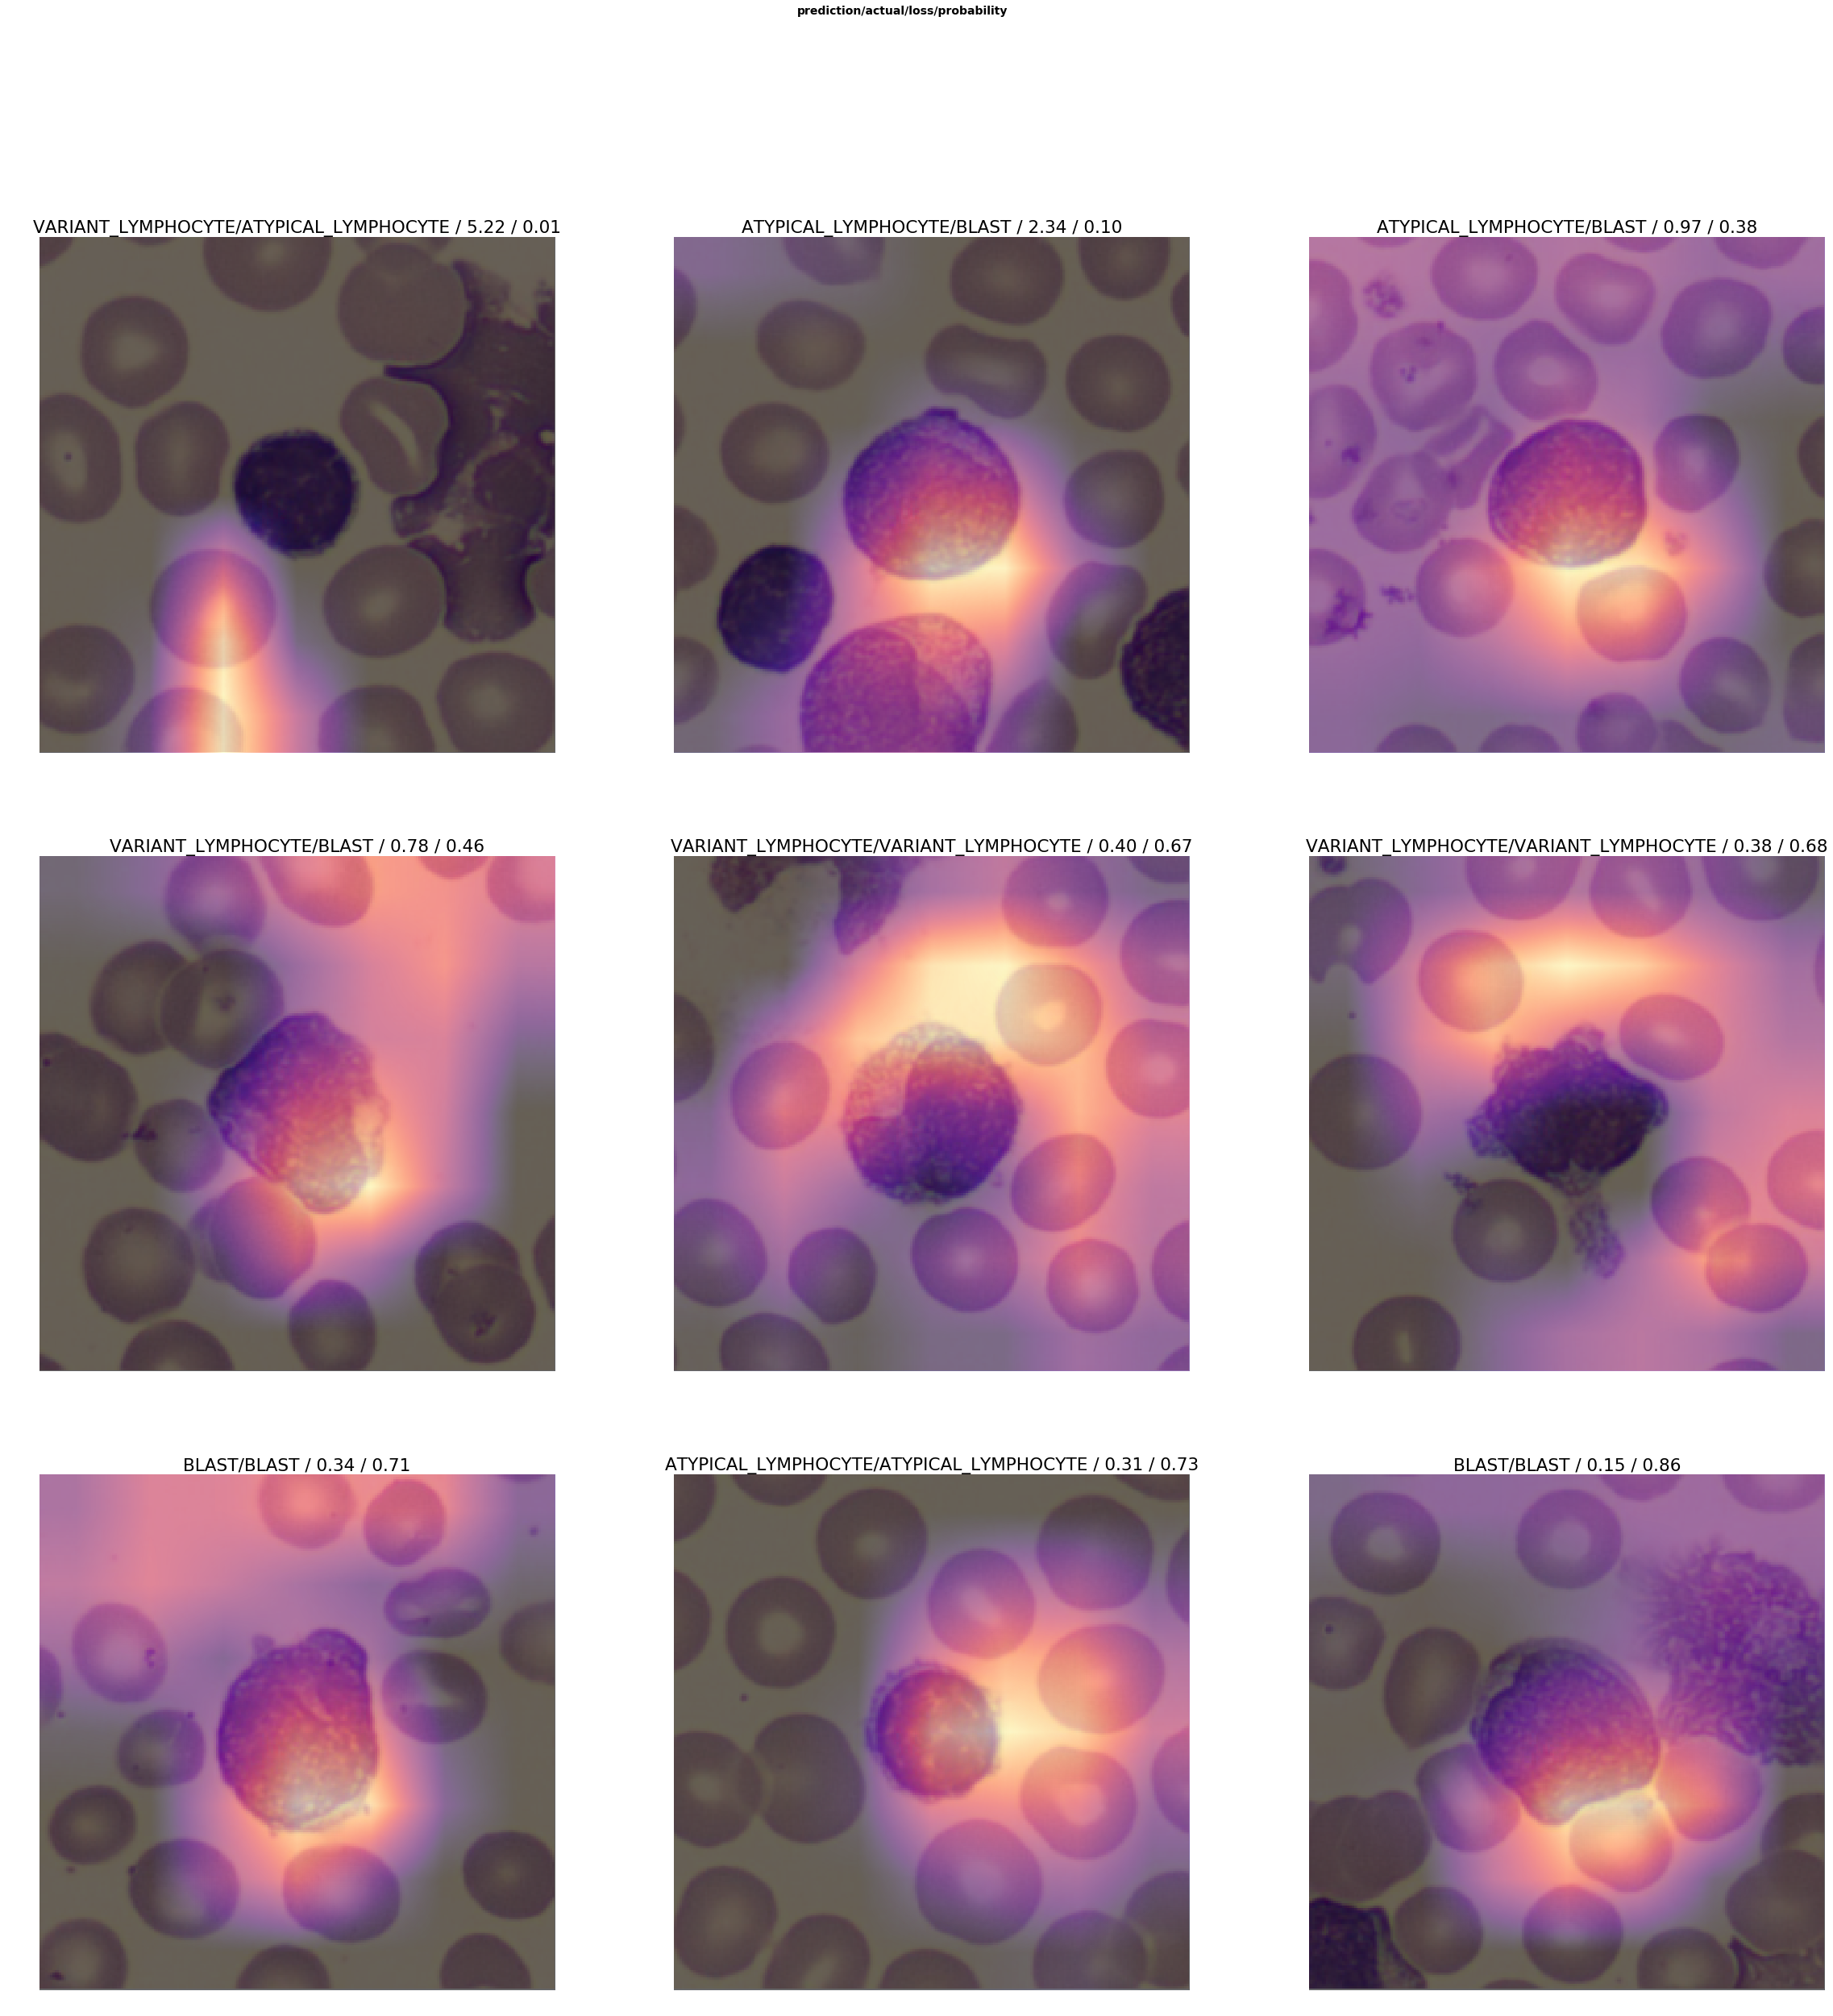

In [31]:
interp.plot_top_losses(9, largest=True, figsize=(40,40), heatmap=True)